In [ ]:
# 1 @ 2 Imported all libraries and loading dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/Users/Win Technology/Downloads/data.csv")

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

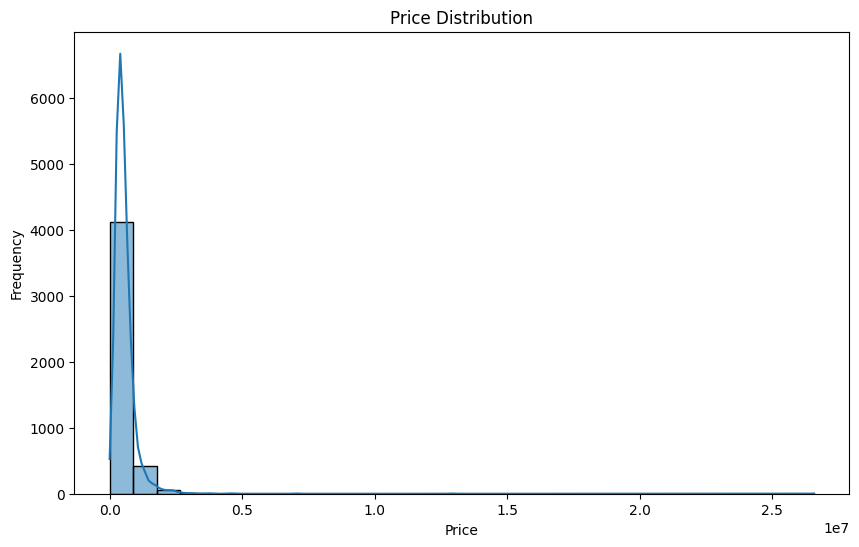

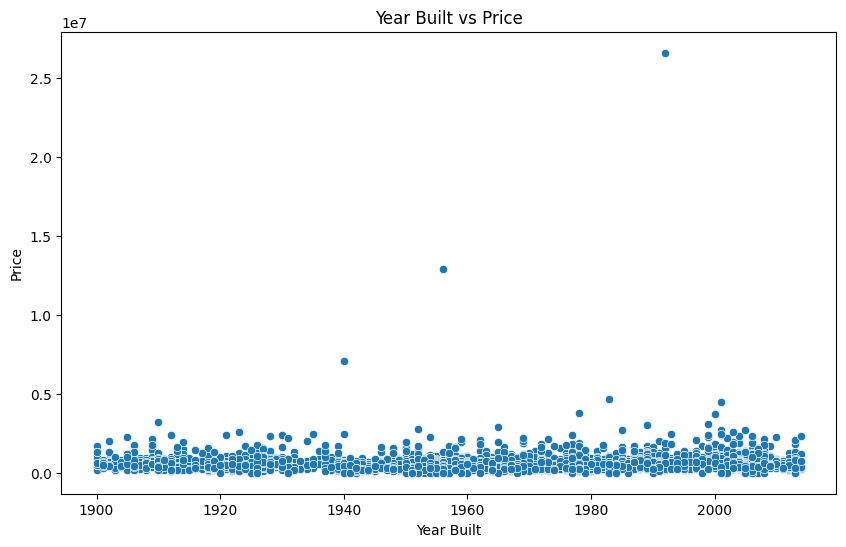

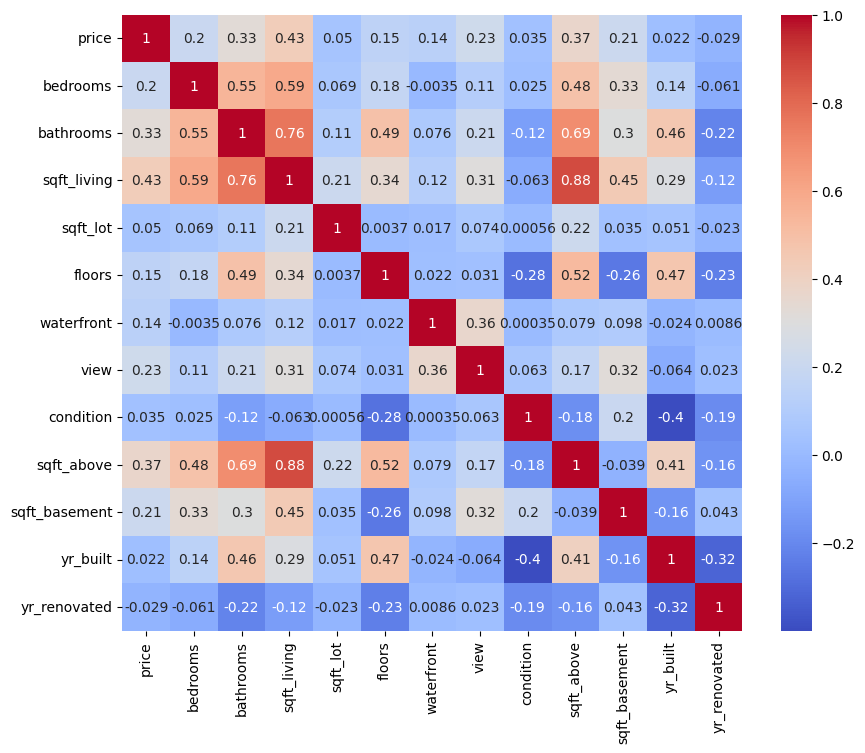

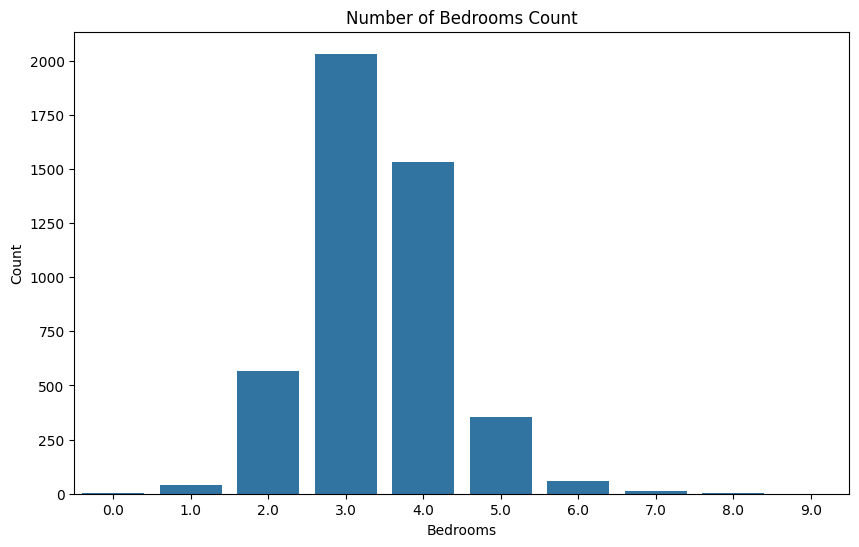

In [5]:
# 3 Performing Exploratory Data Analysis (EDA)
   # using descriptive statistics 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/Win Technology/Downloads/data.csv")
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)
  # Data Visualization
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
#scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='yr_built', y='price', data=df)
plt.title('Year Built vs Price')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()
#correlation heatmap
corr_matrix = df.select_dtypes(include=["number"]).corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# bar plot
plt.figure(figsize=(10,6))
sns.countplot(x='bedrooms', data=df)
plt.title('Number of Bedrooms Count')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()


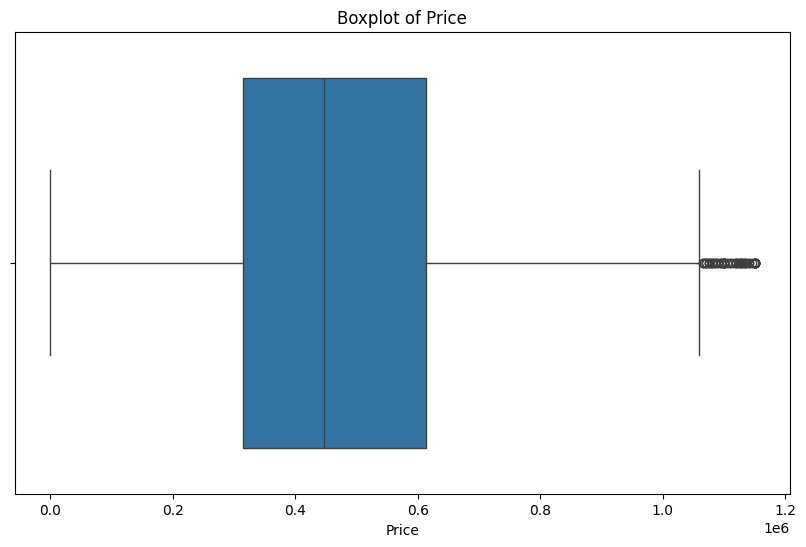

(4307, 18)


In [15]:
# 4 Check for outliers
plt.figure(figsize=(10,6))
sns.boxplot(x='price', data=df)
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()
# removing outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print(df.shape)


In [22]:
# 5 handling missing values
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())
print(df.shape)
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode(numeric_only=True).iloc[0])
print(df.isnull().sum())

date                      0
price                     0
bedrooms                  0
bathrooms                 0
sqft_living               0
sqft_lot                  0
floors                    0
waterfront                0
view                      0
condition                 0
sqft_above                0
sqft_basement             0
yr_built                  0
yr_renovated              0
street                    0
city                      0
statezip                  0
country                   0
age                       0
price_per_sqft            0
house_age                 0
years_since_renovation    0
living_to_lot_ratio       0
basement_pct              0
zipcode                   0
year                      0
month                     0
day                       0
is_renovated              0
dtype: int64
date                      0
price                     0
bedrooms                  0
bathrooms                 0
sqft_living               0
sqft_lot                  0
floors 

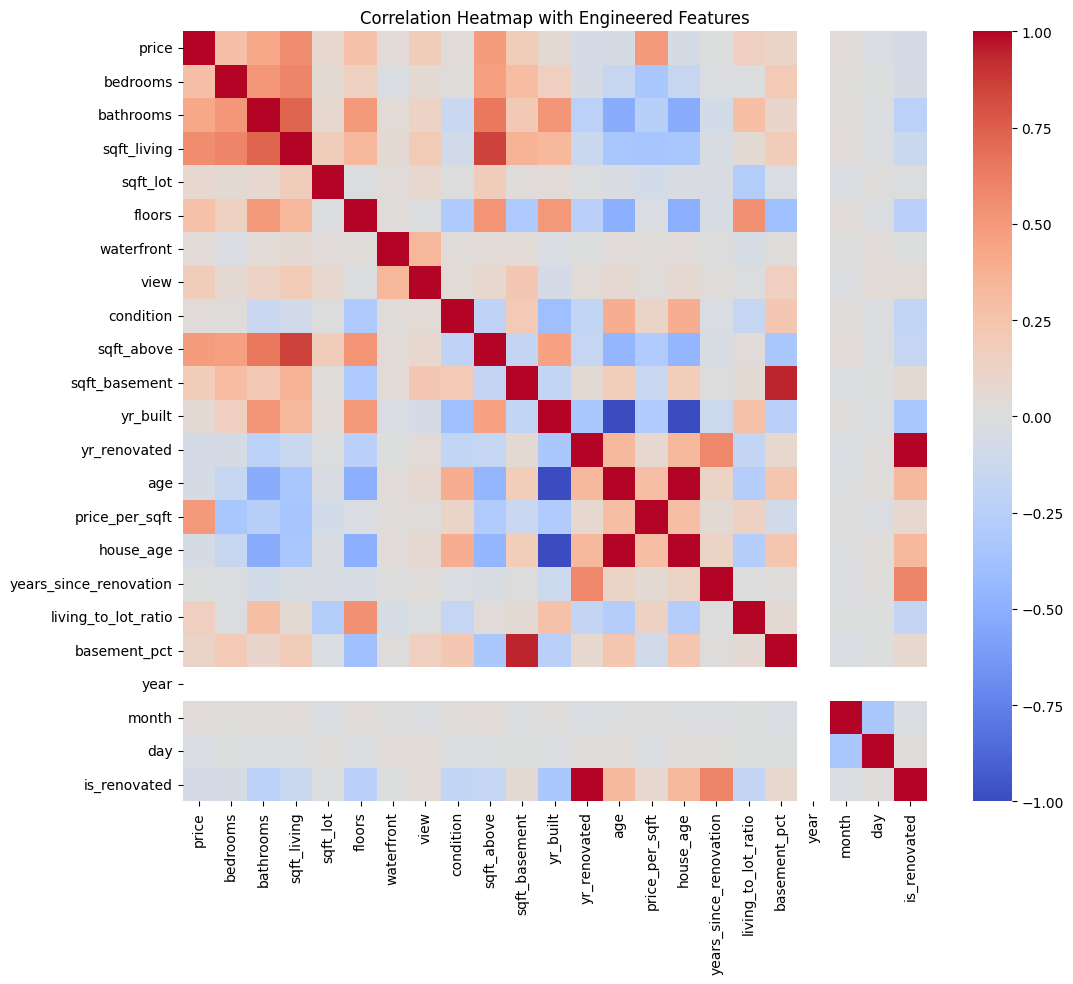

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,age,price_per_sqft,house_age,years_since_renovation,living_to_lot_ratio,basement_pct,year,month,day,is_renovated
price,1.000000,0.274163,0.428090,0.561133,0.081207,0.265913,0.037712,0.173261,0.028898,0.484710,...,-0.057659,0.492326,-0.057659,-0.005015,0.163666,0.111293,NaN,0.025963,-0.025471,-0.065634
bedrooms,0.274163,1.000000,0.515563,0.598982,0.047329,0.154114,-0.025861,0.054806,0.015129,0.464389,...,-0.156651,-0.328593,-0.156651,-0.019184,-0.008382,0.207884,NaN,0.010820,-0.006843,-0.061308
bathrooms,0.428090,0.515563,1.000000,0.728920,0.074776,0.492923,0.044259,0.131712,-0.145088,0.650065,...,-0.517432,-0.251311,-0.517432,-0.079240,0.282723,0.098543,NaN,0.019808,-0.018560,-0.232567
sqft_living,0.561133,0.598982,0.728920,1.000000,0.177012,0.332922,0.054863,0.199346,-0.086648,0.854882,...,-0.335344,-0.348415,-0.335344,-0.040140,0.048808,0.187705,NaN,0.027234,-0.015545,-0.136097
sqft_lot,0.081207,0.047329,0.074776,0.177012,1.000000,-0.009282,0.024523,0.083198,0.007202,0.177532,...,-0.038317,-0.083950,-0.038317,-0.037359,-0.277551,-0.026714,NaN,-0.024381,0.012209,-0.014183


In [19]:
# 6 Feature Engineering
df["house_age"] = 2015 - df["yr_built"]


df["years_since_renovation"] = df.apply(
    lambda row: 0 if row["yr_renovated"] == 0 else 2015 - row["yr_renovated"],
    axis=1
)


df["living_to_lot_ratio"] = df["sqft_living"] / df["sqft_lot"]


df["basement_pct"] = df["sqft_basement"] / df["sqft_living"]


df["zipcode"] = df["statezip"].str.split().str[1]

df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

df["is_renovated"] = (df["yr_renovated"] != 0).astype(int)

df["price_per_sqft"] = df["price"] / df["sqft_living"]

corr_matrix = df.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap with Engineered Features")
plt.show()

corr_matrix.head()

## Project Summary

1. Data overview : 
 * The Dataset is a House priced Dataset whose size is 4600 rows and 18 columns
 * Features : Includes numeric (price, bedrooms, bathrooms, sqft_living, etc.), categorical (street, city, statezip, country), and date columns.
2. Outlier Analysis :
 * Outlier was found, ranging weightened price from about 0.3 to 0.6
3. Missing value treatment:
 * So many missing values were found,from date to is_renovated
4. Important EDA Findings (patterns, distributions, correlations):
 * We got information like first 5 heading, the infos,increasing frequency, boxplot and such on,correlation heatmap
5. Feature Engineering :
 * I introduced a new variable called price per squared feet.
6. Final cleaned dataset ready for modeling:
 * The edited datset is free from outliers and analysed by using many methods. Statstical methods were also applied

I've enjoyed doing this project. I enjoyed the process rather than the result. I look forward to do many projects like that. It is a great way to hone my skills and practice is.  


